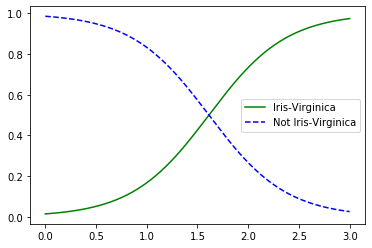

In [28]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(int)
log_reg = LogisticRegression()
log_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.legend()
plt.show()

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X,y = make_classification(n_samples=1000, n_features=20, n_informative=18, n_redundant=2, n_repeated=0, 
                          n_classes=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)
scores = {}
score_reports = {}
max_score = 0
min_diff = 100
for c in [0.0001,0.001,0.01,0.1,1,10]:
    log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=c)
    log_reg.fit(X_train,y_train)
    y_pred = log_reg.predict(X_val)
    y_pred_train = log_reg.predict(X_train)
    train_score = accuracy_score(y_pred_train,y_train)
    val_score = accuracy_score(y_pred,y_val)
    score_reports[c] = classification_report(y_pred,y_val)
    scores[c] = (val_score,train_score)
    if val_score>max_score:
        max_score = val_score
    if val_score-train_score<min_diff:
        min_diff = val_score-train_score
print("Best validation score: ",max_score)
c_best = [j for j in scores.keys() if scores[j][0]==max_score][0]
log_reg_best = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=c_best)
log_reg_best.fit(X_train,y_train)
y_pred_test = log_reg.predict(X_test)
print("Best C value: ",c_best)
print(classification_report(y_pred_test,y_test))

Best validation score:  0.7333333333333333
Best C value:  0.01
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.73      0.68      0.71        44
           2       0.78      0.78      0.78        54

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.p

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)